In [4]:
from rmlmodels.MCLDNN_VGN import *

In [5]:
custom_objects = {'ConvRFF_SinCos': ConvRFF_SinCos, 'abs_backend': abs_backend, 'expand_dim_backend': expand_dim_backend,  'pad_backend': pad_backend}
model =  tf.keras.models.load_model('weights/weights.keras',safe_mode=False, custom_objects=custom_objects)

2024-06-17 23:49:03.130916: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-17 23:49:03.167126: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-17 23:49:03.167408: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [9]:

from sklearn.metrics import accuracy_score
import numpy as np
# Load the data
X_test = np.load('X_test.npy')
Y_test = np.load('Y_test.npy')

# Predictions
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true_classes = np.argmax(Y_test, axis=1)

# Calculate the accuracy
accuracy = accuracy_score(Y_true_classes, Y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

1375/1375 [==============================] - 4s 3ms/step
Accuracy: 63.24%


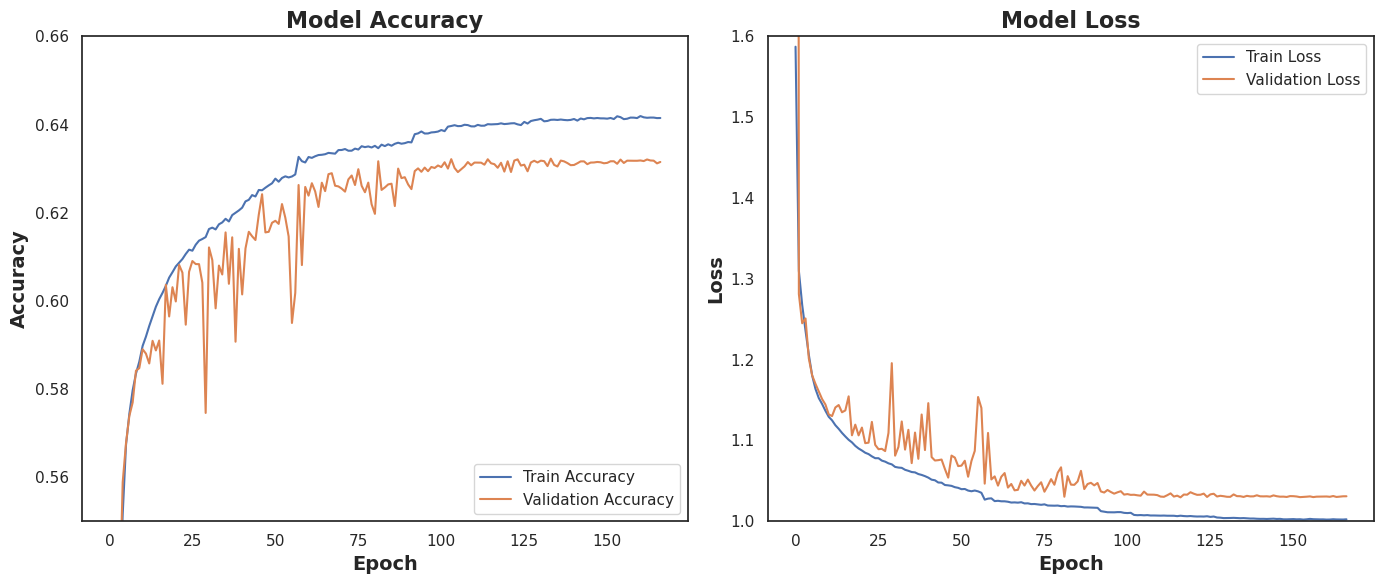

In [23]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="white", rc={"axes.grid": False})  # Disable grid

# Load the history
with open('weights/model_history.pickle', 'rb') as file:
    history = pickle.load(file)

# Plotting
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.ylim(0.55,0.66 )  # Setting the limit for the y-axis
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=14, fontweight='bold')
plt.ylabel('Loss', fontsize=14, fontweight='bold')
plt.ylim(1, 1.6)  # Setting the limit for the y-axis

plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig("loss_accuracy.pdf")
plt.show()

